In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy.optimize as opt
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [15]:
df = pd.read_csv('cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


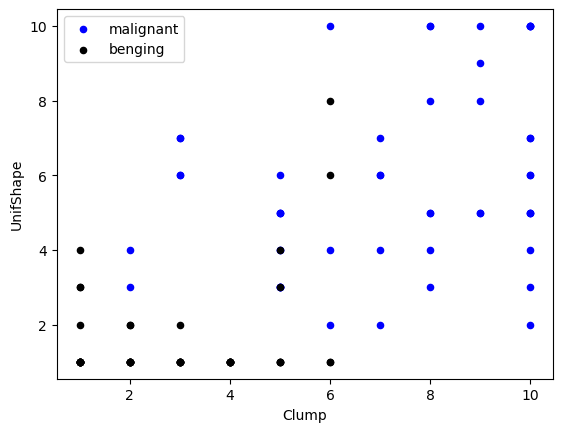

In [23]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter',x='Clump',y='UnifShape' ,color='blue' ,label ='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter',x='Clump',y='UnifShape' ,color='black' ,label = 'benging' ,ax=ax);
plt.show()

In [25]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

It looks like the **BareNuc** column includes some values that are not numerical. We can drop those rows:

In [27]:
df = df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [35]:
fdf = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x = np.asarray(fdf)
x[:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

We want the model to predict the value of Class (that is, benign (=2) or malignant (=4)). As this field can have one of only two possible values, we need to change its measurement level to reflect this.

In [37]:
df['Class'] = df['Class'].astype('int')
y = np.asarray(df['Class'])
y[:5]

array([2, 2, 2, 2, 2])

## Train/Test dataset


In [41]:
X_train , X_test , Y_train , Y_test = train_test_split(x ,y ,test_size=0.2 , random_state = 5)
print(X_train.shape , Y_train.shape)
print(X_test.shape , Y_test.shape)

(546, 9) (546,)
(137, 9) (137,)


In [117]:
from sklearn import svm
clf = svm.SVC(kernel ='poly')
clf.fit(X_train , Y_train)

SVC(kernel='poly')

In [119]:
yhat = clf.predict(X_test)
yhat[:5]

array([2, 2, 2, 2, 4])

# Evaluation

In [121]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.99      1.00      0.99        90
           4       1.00      0.98      0.99        47

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137

Confusion matrix, without normalization
[[90  0]
 [ 1 46]]


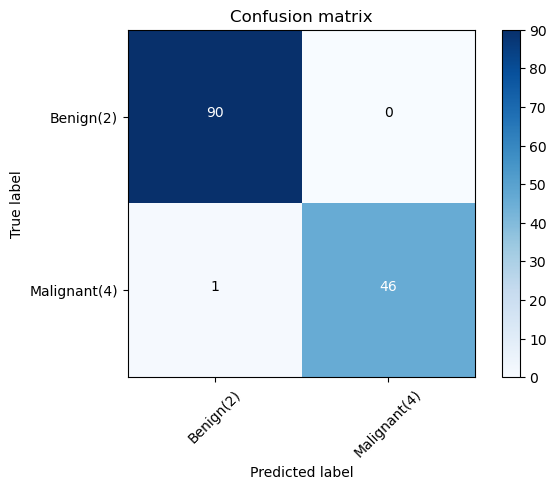

In [123]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(Y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

Let's try the jaccard index for accuracy:

In [125]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test,yhat,pos_label=2)

0.989010989010989

# Saeed AD